In [3]:
from connectPyspark import *
import shutil
import pyspark.sql.functions as F
def print_source(f):
    import inspect
    print(inspect.getsource(f))

:: loading settings :: url = jar:file:/home/pc/TestJupyter/opt/spark-3.3.0/spark-3.3.0-bin-hadoop3/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/pc/.ivy2/cache
The jars for the packages stored in: /home/pc/.ivy2/jars
org.apache.spark#spark-avro_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-32c8c088-a4f4-4f0c-b155-7d6621d37f64;1.0
	confs: [default]
	found org.apache.spark#spark-avro_2.12;3.3.0 in central
	found org.tukaani#xz;1.8 in central
	found org.spark-project.spark#unused;1.0.0 in central
:: resolution report :: resolve 270ms :: artifacts dl 6ms
	:: modules in use:
	org.apache.spark#spark-avro_2.12;3.3.0 from central in [default]
	org.spark-project.spark#unused;1.0.0 from central in [default]
	org.tukaani#xz;1.8 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   3   |

22/10/06 04:32:47 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/10/06 04:32:47 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/10/06 04:32:47 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [2]:
%load_ext autoreload
%autoreload 2
import connectPyspark as cp
from connectPyspark import *
import utilities as u
import shutil

[nltk_data] Downloading package stopwords to /home/pc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Using state  server backend.


In [3]:
def clear_directory_but_keep_sample(path):
    write_avro(read_avro(path).sample(0.06).limit(1000), path+".sample")
    shutil.rmtree(path)
    spark.catalog.clearCache()

#### STEP 6 : STARTING WORD COUNT STATISTICS

In [96]:
df = read_avro("output/5_BI_BC_BM.avro")

In [97]:
from pyspark.sql.window import Window
import pyspark.sql.functions as F
from pyspark.sql.functions import row_number
from pyspark.sql.functions import desc
from pyspark.sql.functions import array_contains

22/10/04 21:12:41 WARN JavaUtils: Attempt to delete using native Unix OS command failed for path = /tmp/blockmgr-128f1212-c243-479e-9950-9e6e7c57f1cd. Falling back to Java IO way
java.io.IOException: Failed to delete: /tmp/blockmgr-128f1212-c243-479e-9950-9e6e7c57f1cd
	at org.apache.spark.network.util.JavaUtils.deleteRecursivelyUsingUnixNative(JavaUtils.java:171)
	at org.apache.spark.network.util.JavaUtils.deleteRecursively(JavaUtils.java:110)
	at org.apache.spark.network.util.JavaUtils.deleteRecursively(JavaUtils.java:91)
	at org.apache.spark.util.Utils$.deleteRecursively(Utils.scala:1206)
	at org.apache.spark.storage.DiskBlockManager.$anonfun$doStop$1(DiskBlockManager.scala:374)
	at org.apache.spark.storage.DiskBlockManager.$anonfun$doStop$1$adapted(DiskBlockManager.scala:370)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.ArrayOps$ofRef.foreach

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 43332)
Traceback (most recent call last):
  File "/opt/python39/lib/python3.9/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/opt/python39/lib/python3.9/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/opt/python39/lib/python3.9/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/opt/python39/lib/python3.9/socketserver.py", line 747, in __init__
    self.handle()
  File "/home/pc/TestJupyter/opt/spark-3.3.0/spark-3.3.0-bin-hadoop3/python/pyspark/accumulators.py", line 281, in handle
    poll(accum_updates)
  File "/home/pc/TestJupyter/opt/spark-3.3.0/spark-3.3.0-bin-hadoop3/python/pyspark/accumulators.py", line 253, in poll
    if func():
  File "/home/pc/TestJupyter/opt/spark-3.3.0/spark-3.3.0-bin

In [8]:
### Flatmap into frequency

In [45]:
df.show()

+--------------------+--------------+
|                text|          lang|
+--------------------+--------------+
|beli dah banyak k...|Language.MALAY|
|         servis laju|Language.MALAY|
|blang smpai cpt c...|Language.MALAY|
|beli time sale me...|Language.MALAY|
|     belum guna lagi|Language.MALAY|
|barang diterima d...|Language.MALAY|
|terbaik semua ter...|Language.MALAY|
|alhamdulillahparc...|Language.MALAY|
|terbaik terbaik t...|Language.MALAY|
|terbaik terbaik t...|Language.MALAY|
|terbaik terbaik t...|Language.MALAY|
|       kualiti bagus|Language.MALAY|
|       kualiti bagus|Language.MALAY|
|       kualiti bagus|Language.MALAY|
|saiz terbesar la ...|Language.MALAY|
|sory gambar dan v...|Language.MALAY|
|beli sampai sb se...|Language.MALAY|
|maaf gambar video...|Language.MALAY|
|bajet diumumkan s...|Language.MALAY|
|terbaik sangat da...|Language.MALAY|
+--------------------+--------------+
only showing top 20 rows



In [47]:
import jieba

df = df.filter(df.text !="")

linebreak_pattern = r"((\r\n\t)|[\n\v\t])+"

df = df.withColumn("text", F.regexp_replace("text", linebreak_pattern, '')) \

def tokenization(text):
    return [x for x in jieba.cut(text, cut_all=True) if x != "" and " " not in x]

df = \
df.rdd.flatMap(lambda x : tokenization(x.text))\
  .map(lambda x : (x,1)) \
  .reduceByKey(lambda V1, V2 : V1+V2) \
  .toDF(["word","word_count"])

df.show()

# df.select("word","word_count", F.row_number().over(Window.partitionBy() \
#   .orderBy(desc(df['word_count']))).alias("id")).write.format("avro").save("output/wc.avro")

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Building prefix dict from the default dictionary .

+-----------+----------+
|       word|word_count|
+-----------+----------+
|    respond|     21218|
|      lebih|     73343|
|    packing|    136599|
|       nice|    661428|
|       spai|      2351|
|     produk|     84857|
|     selesa|    190762|
|      thank|    973309|
|     tiptop|     26296|
|      dapur|      3678|
|     sesuai|    198944|
|    sendiri|     26625|
|sepertimana|       312|
|  sepanjang|      2247|
|         nh|     98468|
|       both|     18128|
|         đã|        85|
|          s|    134719|
|     mantap|    161913|
|      biase|      4883|
+-----------+----------+
only showing top 20 rows



In [48]:
write_avro(df, "output/wc.avro")

#### STEP 7 : WORD COUNT && WORD LANGUAGE DETECTION
- lingua library
- visualize the result of language detection

In [52]:
from pyspark.sql.functions import col, udf
from lingua import Language, LanguageDetectorBuilder
languages = [Language.ENGLISH, Language.CHINESE, Language.MALAY]


nonDistDetector = LanguageDetectorBuilder.from_languages(*languages).build()
withDistDetector = LanguageDetectorBuilder.from_languages(*languages).with_minimum_relative_distance(0.05).build()


def lingua_detect_dist(text):
    global withDistDetector

    try:
        if (withDistDetector == None):
            withDistDetector = LanguageDetectorBuilder.from_languages(*languages).with_minimum_relative_distance(0.05).build()
        return str(withDistDetector.detect_language_of(text))
    
    except:
        return "error"

def lingua_detect(text):
    global nonDistDetector
    
    try:
        if (nonDistDetector == None):
            nonDistDetector = LanguageDetectorBuilder.from_languages(*languages).build()
        return str(nonDistDetector.detect_language_of(text))
    except:
        return "error"    

detectWithDistUDF = udf(lambda z: lingua_detect_dist(z))
detectUDF = udf(lambda z: lingua_detect(z))

In [49]:
%load_ext autoreload
%autoreload 2
from connectPyspark import *
from pyspark.sql.functions import col, udf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
df = read_avro("output/wc.avro")


# 🆂🅰🅼🅿🅻🅴
### SORRY NO SAMPLE FOR THIS BECAUSE IT IS CONVERTED INTO WC LANGUAGE, SHOW LATER YA

AnalysisException: Path does not exist: file:/home/pc/Assignment/SocialMedia/Main/output/wc.avro

In [53]:
vocabLang =  df.withColumn('wordLang', detectUDF(col('word')))

In [6]:
# vocabLang.show(100)


# 🆂🅰🅼🅿🅻🅴
### SHOWING HOW VOCAB LANG WORKS
read_avro("output/7_wcLang.avro").show(100, False)

+------------+----------+---+----------------+
|word        |word_count|id |wordLang        |
+------------+----------+---+----------------+
|good        |4054219   |1  |Language.ENGLISH|
|seller      |2789294   |2  |Language.ENGLISH|
|the         |1983434   |3  |Language.ENGLISH|
|and         |1556722   |4  |Language.ENGLISH|
|barang      |1328427   |5  |Language.MALAY  |
|you         |1297632   |6  |Language.ENGLISH|
|sampai      |1287290   |7  |Language.MALAY  |
|delivery    |1253564   |8  |Language.ENGLISH|
|fast        |1217180   |9  |Language.ENGLISH|
|for         |1202902   |10 |Language.ENGLISH|
|tq          |1184559   |11 |Language.ENGLISH|
|terbaik     |1132002   |12 |Language.MALAY  |
|in          |1005267   |13 |Language.ENGLISH|
|to          |989956    |14 |Language.ENGLISH|
|is          |987598    |15 |Language.ENGLISH|
|thank       |973309    |16 |Language.ENGLISH|
|ok          |942106    |17 |Language.MALAY  |
|baik        |909901    |18 |Language.MALAY  |
|i           

In [55]:
vocabLang = vocabLang.coalesce(74)                                                                                                                                                       \
    .select("word","word_count", F.row_number()
    .over(Window.partitionBy()
            .orderBy(desc(vocabLang['word_count'])))
    .alias("id"), "wordLang")

write_avro(vocabLang, "output/7_wcLang.avro")

22/10/04 16:21:36 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/04 16:21:36 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/04 16:21:36 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


22/10/04 16:29:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/04 16:29:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


In [8]:
df = read_avro("output/7_wcLang.avro")

In [57]:
df.show()

+--------+----------+---+----------------+
|    word|word_count| id|        wordLang|
+--------+----------+---+----------------+
|    good|   4054219|  1|Language.ENGLISH|
|  seller|   2789294|  2|Language.ENGLISH|
|     the|   1983434|  3|Language.ENGLISH|
|     and|   1556722|  4|Language.ENGLISH|
|  barang|   1328427|  5|  Language.MALAY|
|     you|   1297632|  6|Language.ENGLISH|
|  sampai|   1287290|  7|  Language.MALAY|
|delivery|   1253564|  8|Language.ENGLISH|
|    fast|   1217180|  9|Language.ENGLISH|
|     for|   1202902| 10|Language.ENGLISH|
|      tq|   1184559| 11|Language.ENGLISH|
| terbaik|   1132002| 12|  Language.MALAY|
|      in|   1005267| 13|Language.ENGLISH|
|      to|    989956| 14|Language.ENGLISH|
|      is|    987598| 15|Language.ENGLISH|
|   thank|    973309| 16|Language.ENGLISH|
|      ok|    942106| 17|  Language.MALAY|
|    baik|    909901| 18|  Language.MALAY|
|       i|    882394| 19|  Language.MALAY|
|      it|    876402| 20|Language.ENGLISH|
+--------+-

In [14]:
from LangAgg import *
agg = LanguageAggregor(df, "wordLang")

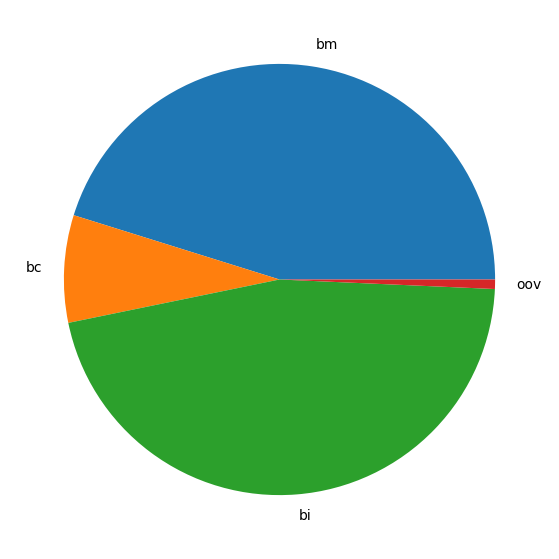

In [15]:
allc = df.count()
bm = agg.get_lang_dataframe("Language.MALAY").count()
bi = agg.get_lang_dataframe("Language.ENGLISH").count()
bc = agg.get_lang_dataframe("Language.CHINESE").count()
oov = allc - bi -bc -bm

v = [bm, bc, bi, oov]
l = ["bm","bc","bi","oov"]

from matplotlib import pyplot as plt
def draw_pie(cake, count): 
    fig = plt.figure(figsize =(10, 7))
    plt.pie(count, labels = cake)
    plt.show()
    
draw_pie(l, v)

In [19]:
agg.all_language

['None', 'Language.ENGLISH', 'Language.MALAY', 'Language.CHINESE']

In [20]:
agg.get_lang_dataframe("None").show()
agg.get_lang_dataframe("Language.ENGLISH").show()
agg.get_lang_dataframe("Language.MALAY").show()
agg.get_lang_dataframe("Language.CHINESE").show()


# 🆂🅰🅼🅿🅻🅴
### SHOWING WHAT IS INSIDE THE LANG AGG

+----+----------+-----+--------+
|word|word_count|   id|wordLang|
+----+----------+-----+--------+
|   ắ|     48745|  426|    None|
|   ᴗ|      1234| 6152|    None|
|   ​|      1017| 6999|    None|
|   ̇|       919| 7528|    None|
|   ³|       887| 7701|    None|
|   ω|       718| 8870|    None|
|   ķ|       687| 9142|    None|
|   ๑|       645| 9523|    None|
|   ấ|       570|10284|    None|
|   ͢|       562|10380|    None|
|   ﾟ|       428|12373|    None|
|   ̶|       379|13353|    None|
|   ģ|       365|13665|    None|
|   є|       354|13945|    None|
|   ᴥ|       342|14294|    None|
|  ͜͡|       308|15245|    None|
|   ʕ|       303|15361|    None|
|  っ|       286|15957|    None|
|   ﾉ|       282|16116|    None|
|   ậ|       280|16182|    None|
+----+----------+-----+--------+
only showing top 20 rows

+--------+----------+---+----------------+
|    word|word_count| id|        wordLang|
+--------+----------+---+----------------+
|    good|   4054219|  1|Language.ENGLISH|
|  seller| 

#### STEP 8 : SELECT TOPIC
- lingua library
- visualize the result of language detection

In [87]:
from nltk.corpus import stopwords
import json
malayStopWords = set(json.load(open("/home/pc/Assignment/node_modules/stopwords-ms/stopwords-ms.json")))
stopwordsSet = set(stopwords.words('english') + stopwords.words('chinese') ).union(malayStopWords)

In [88]:
reg =   ["^"+x+"$" for x in stopwordsSet]
reg = "|".join(reg)

In [90]:
reg 


# 🆂🅰🅼🅿🅻🅴
### SHOWING HOW　THE REGEX LOOK LIKE TO EXCLUDE THE STOPWORDS

"^after$|^jumlah$|^喔唷$|^adalah$|^运用$|^penduduk$|^充分$|^吓$|^termasuk$|^kerjasama$|^果真$|^保持$|^here$|^menerusi$|^能$|^通常$|^diniagakan$|^sudah$|^上下$|^哪些$|^syarikat$|^lebih$|^呗$|^shouldn't$|^negeri$|^多次$|^di$|^人家$|^而且$|^仍然$|^该$|^直到$|^周围$|^总的来说$|^peserta$|^那么$|^哼$|^打$|^一般$|^具体地说$|^paras$|^supaya$|^高兴$|^pengeluaran$|^doesn$|^semula$|^up$|^属于$|^aren$|^serta$|^but$|^之所以$|^转动$|^出来$|^you're$|^has$|^哈$|^不但$|^表示$|^有利$|^密切$|^者$|^doesn't$|^尽$|^barangan$|^喂$|^首先$|^每当$|^鄙人$|^如此$|^hasn$|^最后$|^纵然$|^极了$|^luar$|^kereta$|^langkah$|^以来$|^以外$|^above$|^到$|^丰富$|^below$|^嘎$|^以至于$|^相似$|^t$|^方便$|^这些$|^sesi$|^mei$|^sebahagian$|^isnin$|^不足$|^出去$|^限制$|^扩大$|^dijangka$|^juga$|^empat$|^tempat$|^假若$|^kerja$|^看到$|^urus$|^kawasan$|^hadn$|^哗$|^couldn$|^没有$|^shan$|^规定$|^didn$|^不怕$|^这就是说$|^不比$|^也罢$|^一面$|^herself$|^mudah$|^jabatan$|^要不$|^以$|^及至$|^untung$|^politik$|^产生$|^失去$|^mencatatkan$|^pada$|^bekas$|^niaga$|^sini$|^允许$|^组成$|^shan't$|^或是$|^能够$|^不变$|^sarawak$|^哪年$|^perusahaan$|^掌握$|^广大$|^mana$|^个$|^ringgit$|^之类$|^是$|^只限$|^he$|^

In [95]:
df = read_avro("output/7_wcLang.avro")

regex = "|".join(list(stopwordsSet)) 

df = df.filter(~df.word.rlike(reg))

df = df.select("word","word_count", F.row_number().over(Window.partitionBy() \
  .orderBy(desc(df['word_count']))).alias("id")).show(10000, False)


# 🆂🅰🅼🅿🅻🅴
### SHOWING THE WORD LIST WITHOUT STOPWORDS

22/10/04 16:49:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/04 16:49:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/04 16:49:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+----------------------------------------------------+----------+-----+
|word                                                |word_count|id   |
+----------------------------------------------------+----------+-----+
|good                                                |4054219   |1    |
|seller                                              |2789294   |2    |
|barang                                              |1328427   |3    |
|sampai                                              |1287290   |4    |
|delivery                                            |1253564   |5    |
|fast                                                |1217180   |6    |
|tq                                                  |1184559   |7    |
|thank                                               |973309    |8    |
|ok                                                  |942106    |9    |
|beli                                                |844194    |10   |
|dah                                                 |780921    